Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report



Load dataset

In [2]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Renaming the columns and keeping only necessary columns

In [4]:
df = df[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'message'})
df = df.drop_duplicates()
print(df.columns)

Index(['label', 'message'], dtype='object')


checking for null values

In [5]:
df.isnull().sum()

label      0
message    0
dtype: int64

Checking the shape and dimenshion

In [6]:
print(df.shape)
print(df.ndim)

(5169, 2)
2


Data distribution

In [7]:
df['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

Plot distribution

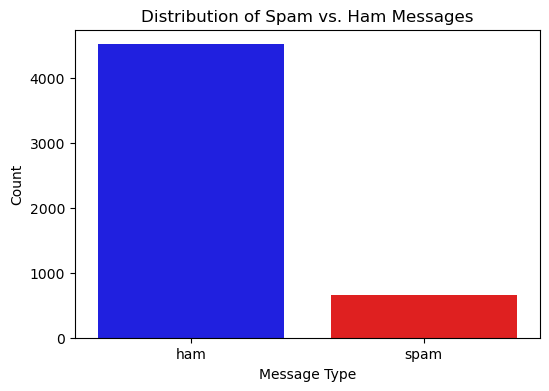

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['label'], hue=df['label'], palette=["blue", "red"], legend=False)
plt.title("Distribution of Spam vs. Ham Messages")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()

Using WordCloud for Spam and Ham Messages

In [9]:
spam_words = ' '.join(df[df['label'] == 'spam']['message'])
ham_words = ' '.join(df[df['label'] == 'ham']['message'])


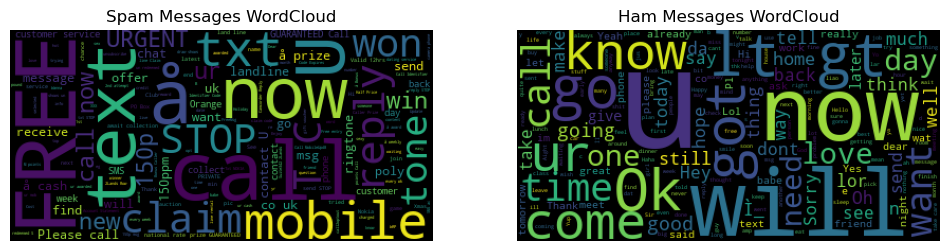

In [10]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Spam Messages WordCloud")
plt.imshow(WordCloud(width=400, height=200, background_color='black').generate(spam_words))
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Ham Messages WordCloud")
plt.imshow(WordCloud(width=400, height=200, background_color='black').generate(ham_words))
plt.axis("off")
plt.show()

Text Processing and Training the Model

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

Using Multinomial Naive Bayes model

In [13]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

Testing the Model

In [14]:
X_test_counts = vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
y_pred = nb_model.predict(X_test_tfidf)

Model Evaluation

In [15]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Naive Bayes Accuracy: 0.9555125725338491

Classification Report:
               precision    recall  f1-score   support

         ham       0.95      1.00      0.97       889
        spam       1.00      0.68      0.81       145

    accuracy                           0.96      1034
   macro avg       0.98      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034

